# Corretor Ortografico

### Importando arquivo

In [69]:
with open('dados/artigos.txt', 'r', encoding="utf8") as f: 
#Com o meu arquivo(parametros para abrir) chamado de f, faça tal coisa:
    artigos = f.read() #vai ler o arquivo
    
print(artigos[:500]) #ler apenas os 500 primeiros caracteres
#Onde está escrito 'imagem' é porque realmente tem uma imagem no local
#Onde está escrito 'java' é porque realmente tem um codigo java no local
#Ou seja, ele vai trazer somente palavras escritas no texto.

AC
Aarão
Abel
Abelardo
Abissínia
Abner
Abraão
Absalão
Acab
Acaia
Acker
Aconcágua
Acre
Acrópole
Adauto
Ademir
Adhemar
Adolfo
Adriana
Adriano
Adriático
Adroaldo
Afeganistão
Afonso
Afrodite
Agostinho
Aires
Ajax
Alagoas
Alair
Alarico
Alasca
Alberta
Albertina
Alberto
Alceu
Alcibíades
Alcino
Aldebarã
Alemanha
Alencar
Alexandra
Alexandre
Alexandria
Alfredo
Algol
Aline
Alpes
Alsácia
Altair
Alvarenga
Alá
Amadeu
Amapá
Amazonas
Amazônia
Ambrósio
Amália
América
Ana
Anastácia
Anastácio
Anatólia
Anaxágoras
An


### Tokenização

In [70]:
#quantas palavras o arquivo possui?
len(artigos)

2856242

In [71]:
len("ola") #para conferir o que o CMD LEN está contando, palavra ou letra?
#contou 3 caracteres

3

In [72]:
texto_exemplo = 'ola, tudo bem?' #para entender menlhor como funciona
palavras_separadas = texto_exemplo.split()

palavras_separadas
#As pontuações estão misturadas com as palavras

['ola,', 'tudo', 'bem?']

In [73]:
# cada elemento dessa variavel (palavras_separadas), se chamam tokens, 
# ou seja, no exemplo acima tenho 3 tokens

In [74]:
tokens = palavras_separadas

#ferramenta para NLP
import nltk
nltk.download('punkt')
palavras_separadas = nltk.tokenize.word_tokenize(texto_exemplo)

palavras_separadas
#perceba que agora, pontuaçao tabem se torna um token (total de 5 agora)

[nltk_data] Downloading package punkt to C:\Users\Notebook
[nltk_data]     Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['ola', ',', 'tudo', 'bem', '?']

In [75]:
'palavra'.isalpha() #metodo para descobrir se é alfabetico ou nao (retorna True ou False)

True

In [76]:
#criando funçao para desconsiderar acentuaçao.
def separa_palavras(lista_tokens):
    lista_palavras = []
    #percorrer a lista de tokens e perguntar se o token é uma palavra
    for token in lista_tokens:
        if token.isalpha():
            lista_palavras.append(token)
    return lista_palavras

separa_palavras(palavras_separadas)
#agora ja esta separado em palavras

['ola', 'tudo', 'bem']

##### Aplicando a lista de tokens para o Corpus

In [77]:
lista_tokens = nltk.tokenize.word_tokenize(artigos)
lista_palavras = separa_palavras(lista_tokens)

In [78]:
print(f'Quantidade de palavras no Corpus - {len(lista_palavras)}')

Quantidade de palavras no Corpus - 261798


In [79]:
#quantas palavras o meu corretor poderá corrigir?
#descondiderar palavras repetidas e tipos de palavras repetidas


lista_palavras[:5]
#antes de prosseguir, preciso deixar todas as palavras em minusculo

['AC', 'Aarão', 'Abel', 'Abelardo', 'Abissínia']

##### Deixando todas as palavras em minusculo

In [80]:
def normalizacao(lista_palavras):
    lista_normalizada = [] #criando a lista
    for palavra in lista_palavras: #vai receber a lista de palavras
        lista_normalizada.append(palavra.lower()) #vai retornar em minusculo
    return(lista_normalizada)

lista_normalizada = normalizacao(lista_palavras)

lista_normalizada[:5]
#note que agora tudo esta em minusculo

['ac', 'aarão', 'abel', 'abelardo', 'abissínia']

##### Remover as palavras repetidas

In [81]:
set(lista_normalizada) #SET pega uma lista e retorna um conjunto sem repetiçao

{'incrementavas',
 'rendado',
 'avalizarmo',
 'baliremo',
 'desatravancáveis',
 'interiormente',
 'enraivecêssemos',
 'jubilamo',
 'incrementássemos',
 'saltitemo',
 'expandiam',
 'eletrizara',
 'aparelharemo',
 'aconcágua',
 'arborizarmos',
 'aglomerávamos',
 'alterardes',
 'zangareis',
 'latirias',
 'arremessais',
 'encarregarmos',
 'escangalháreis',
 'dosávamos',
 'estrondearem',
 'incrementaram',
 'perenizavas',
 'acarpetávamos',
 'reembarcaram',
 'conviveis',
 'marginalizemo',
 'perigoso',
 'asseverarei',
 'mandatos',
 'brincaram',
 'paninho',
 'convidariam',
 'conciliatória',
 'apostrofais',
 'chaves',
 'desmoralizaríamos',
 'singularizarás',
 'transarei',
 'vagaríeis',
 'apagareis',
 'flagelarmos',
 'arremessada',
 'cismes',
 'adaptem',
 'utilitário',
 'assediavas',
 'escapulia',
 'arbítrios',
 'enredos',
 'alagasse',
 'estenografe',
 'sacolejamo',
 'alucinadora',
 'empunharão',
 'gramado',
 'chilreias',
 'multiplicáveis',
 'maquinais',
 'coabitarmos',
 'interligavas',
 'reconfi

In [82]:
len(set(lista_normalizada)) #quantidade total de palavras que o corretor vai aprender.

261494

### Estruturando o corretor

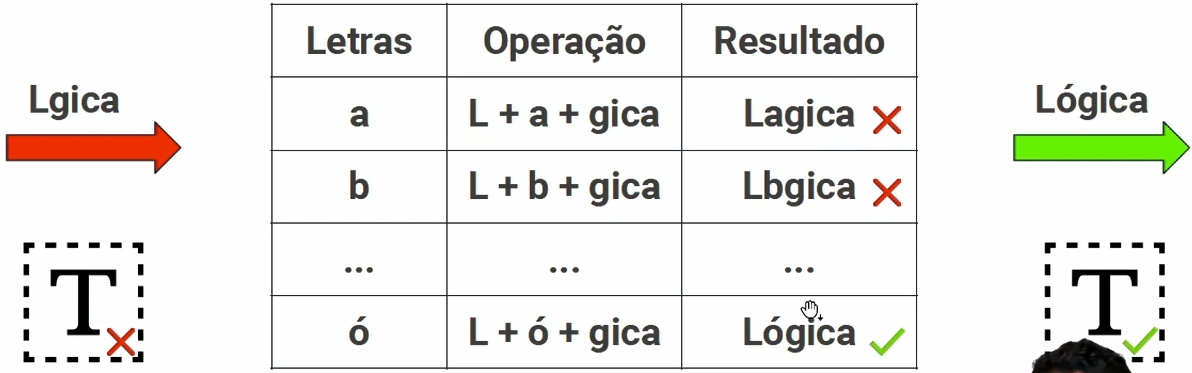

Maneira de como tem que ser a operaçao

In [83]:
# porem precisa generalizar a logica, pois existe uma infinidade de palavras parecidas (mapa , mata, maca)

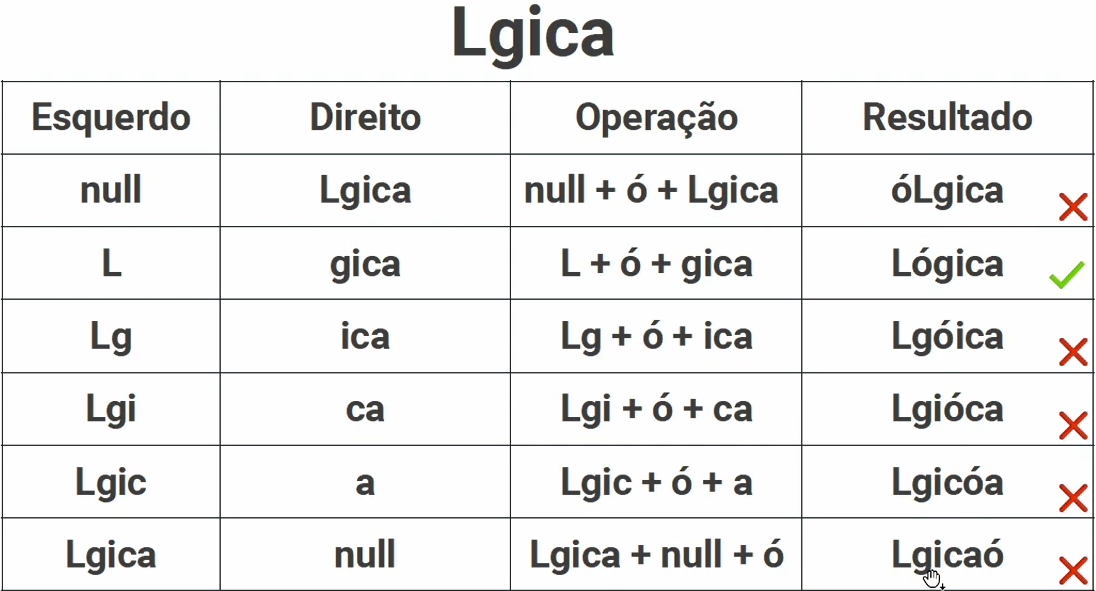

estrutura de verificaçao

In [84]:
#fatiando lista para entender como fatiar entre direito e esquerdo da imagem acima
lista = 'lgica'
lista

'lgica'

In [85]:
#fatiando lista para entender como fatiar entre direito e esquerdo da imagem acima
(lista[:1], lista[1:])
#agora é só variar os numeros de dentro da lista para percorrer cada lado (utilizando FOR)

('l', 'gica')

In [86]:
# código teste para ver como faz o fatiador, que será utilizado no codigo abaixo

palavra_exemplo = 'lgica' #exemplo de palavra qualquer

def gerador_palavras(palavra): #funçao 
    fatias = [] #o lado direito e o lado esquerdo da imagem acima
    for i in range(len(palavra)+1):
        fatias.append((lista[:i], lista[i:]))
    print(fatias)
    
gerador_palavras(palavra_exemplo)

[('', 'lgica'), ('l', 'gica'), ('lg', 'ica'), ('lgi', 'ca'), ('lgic', 'a'), ('lgica', '')]


##### Definido o fatiamento das palavras, agora vamos criar a função para inserir a letra no fatiamento.

In [87]:
palavra_exemplo = 'lgica' #exemplo de palavra qualquer

def insere_letras(fatias):    
    novas_palavras = []
    letras = 'abcdefghijklmnopqrstuvwxyzàáâãèéêìíîòóôõùúûç'
    #para verificar cada letra acima e incluir no meio do fatiamento
    for E, D in fatias: #para cada E e D na variavel fatias
        for letra in letras:
            novas_palavras.append(E + letra + D)
    return novas_palavras

#daqui para baixo eu copiei o codigo acima pq foi dito que assim teria que ficar, acima foi apenas p/ testar
def gerador_palavras(palavra): #funçao 
    fatias = [] #o lado direito e o lado esquerdo da imagem acima
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i], palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    return palavras_geradas

palavras_geradas = gerador_palavras(palavra_exemplo)

palavras_geradas
# nesta lista gerada está a palavra LÓGICA em algum ponto

['algica',
 'blgica',
 'clgica',
 'dlgica',
 'elgica',
 'flgica',
 'glgica',
 'hlgica',
 'ilgica',
 'jlgica',
 'klgica',
 'llgica',
 'mlgica',
 'nlgica',
 'olgica',
 'plgica',
 'qlgica',
 'rlgica',
 'slgica',
 'tlgica',
 'ulgica',
 'vlgica',
 'wlgica',
 'xlgica',
 'ylgica',
 'zlgica',
 'àlgica',
 'álgica',
 'âlgica',
 'ãlgica',
 'èlgica',
 'élgica',
 'êlgica',
 'ìlgica',
 'ílgica',
 'îlgica',
 'òlgica',
 'ólgica',
 'ôlgica',
 'õlgica',
 'ùlgica',
 'úlgica',
 'ûlgica',
 'çlgica',
 'lagica',
 'lbgica',
 'lcgica',
 'ldgica',
 'legica',
 'lfgica',
 'lggica',
 'lhgica',
 'ligica',
 'ljgica',
 'lkgica',
 'llgica',
 'lmgica',
 'lngica',
 'logica',
 'lpgica',
 'lqgica',
 'lrgica',
 'lsgica',
 'ltgica',
 'lugica',
 'lvgica',
 'lwgica',
 'lxgica',
 'lygica',
 'lzgica',
 'làgica',
 'lágica',
 'lâgica',
 'lãgica',
 'lègica',
 'légica',
 'lêgica',
 'lìgica',
 'lígica',
 'lîgica',
 'lògica',
 'lógica',
 'lôgica',
 'lõgica',
 'lùgica',
 'lúgica',
 'lûgica',
 'lçgica',
 'lgaica',
 'lgbica',
 'lgcica',

##### Aplicando a palavra correta no corretor

In [88]:
def corretor(palavra):
    palavras_geradas = gerador_palavras(palavra)
    #codigo abaixo: calcular a palavra com maior probabilidade de ser a correta
    palavra_correta = max(palavras_geradas, key=probabilidade) #esse é o ponto que temos que definir, aqui que vai verificar o que é correto
    return palavra_correta

In [89]:
#como se caucula a probabilidade de uma palavra?
# frequencia_palavra / total_de_palavras
frequencia = nltk.FreqDist(lista_normalizada) #lista com palavras sem repetiçao
frequencia.most_common(10) #vai mostrar as N palavras mais frequentes da lista.

[('abissínia', 2),
 ('acre', 2),
 ('acrópole', 2),
 ('afonso', 2),
 ('agostinho', 2),
 ('aires', 2),
 ('alagoas', 2),
 ('alberto', 2),
 ('alencar', 2),
 ('alexandre', 2)]

In [90]:
#acessar a frequencia de cada uma das palavras
frequencia['lógica']

1

In [91]:
total_palavras = len(lista_normalizada)

In [92]:
#construindo a funçao da probabilidade
def probabilidade(palavra_gerada):
    return frequencia[palavra_gerada] / total_palavras

probabilidade('logica')

0.0

In [93]:
corretor(palavra_exemplo)
#corretor finalizado, porem serve apenas quando falta letra na palava.
# a seguir será montado para outras causas de erro, como letras duplas

'lógica'

##### Ampliando espaço de correção

In [94]:
#como saber que estou melhorando? comparando a versao anterior com a antiga
#Função que vai receber os dados de testes e calcular a taxa de acerto do corretor
def cria_dados_teste(nome_arquivo): #essa funçao vai receber o arquivo que contem palavras erradas
    lista_palavras_teste = []
    #separar o lado correto e o lado errado (que contem no arquivo)
    f = open(nome_arquivo, 'r', encoding="utf8") #mesmo F definido no começo do curso
    for linha in f: #para cada linha no arquivo F, faça
        correta, errada = linha.split()
        lista_palavras_teste.append((correta, errada))
    f.close
    return lista_palavras_teste

lista_teste = cria_dados_teste('dados/palavras.txt')

lista_teste

[('podemos', 'pyodemos'),
 ('esse', 'esje'),
 ('já', 'jrá'),
 ('nosso', 'nossov'),
 ('são', 'sãêo'),
 ('dos', 'dosa'),
 ('muito', 'muifo'),
 ('imagem', 'iômagem'),
 ('sua', 'ósua'),
 ('também', 'tambéùm'),
 ('ele', 'eme'),
 ('fazer', 'èazer'),
 ('temos', 'temfs'),
 ('essa', 'eàssa'),
 ('quando', 'quaôdo'),
 ('vamos', 'vamvos'),
 ('sobre', 'hsobre'),
 ('java', 'sjava'),
 ('das', 'daõs'),
 ('agora', 'agorah'),
 ('está', 'eòtá'),
 ('cada', 'céda'),
 ('mesmo', 'zmesmo'),
 ('nos', 'noâ'),
 ('forma', 'fobma'),
 ('seja', 'sejéa'),
 ('então', 'enêão'),
 ('criar', 'èriar'),
 ('código', 'cóeigo'),
 ('caso', 'casío'),
 ('exemplo', 'áexemplo'),
 ('tem', 'tĩem'),
 ('usuário', 'usuárôio'),
 ('dados', 'dfados'),
 ('python', 'pgthon'),
 ('nossa', 'nossah'),
 ('além', 'alémè'),
 ('assim', 'asõim'),
 ('ter', 'teb'),
 ('até', 'atĩ'),
 ('bem', 'âem'),
 ('design', 'desigen'),
 ('trabalho', 'trabalàho'),
 ('foi', 'foo'),
 ('apenas', 'apenaũ'),
 ('empresa', 'empresà'),
 ('valor', 'valíor'),
 ('será', 'serr')

In [95]:
def avaliador(testes):
    numero_palavras = len(testes)
    acertou = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        if palavra_corrigida == correta:
            acertou += 1
    taxa_acerto = acertou/numero_palavras
    print(f"{taxa_acerto}")
    
avaliador(lista_teste)

0.021505376344086023


In [96]:
#deixando o print mais amigavel
def avaliador(testes):
    numero_palavras = len(testes)
    acertou = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        if palavra_corrigida == correta:
            acertou += 1
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    print(f"Taxa de acerto do corretor - {taxa_acerto}% / De um total de {numero_palavras} palavras")
    
avaliador(lista_teste)
#a taxa está baixa pois só corrigi um tipo de erro

Taxa de acerto do corretor - 2.15% / De um total de 186 palavras


### Melhorando o Corretor

##### Deletando 1 letra a mais na palavra

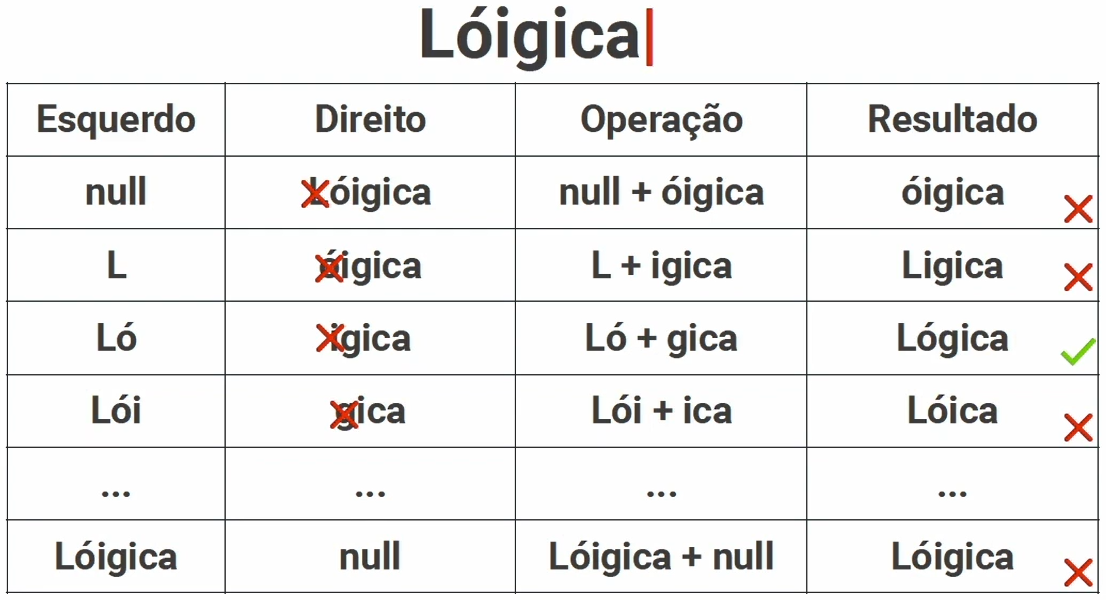

Logica para quando é digitado uma letra a mais na palavra

In [97]:
'mosquito'[1:] #Para conhecimento, deletando uma letra.

'osquito'

In [98]:
#funçao para deletar as letras a mais digitada sem querer
def deletando_caracteres(fatias):    
    novas_palavras = []
    #para verificar cada letra acima e incluir no meio do fatiamento
    for E, D in fatias: #para cada E e D na variavel fatias
        novas_palavras.append(E + D[1:])
    return novas_palavras

In [99]:
palavra_exemplo = 'loigica'

def gerador_palavras(palavra): #funçao 
    fatias = [] #o lado direito e o lado esquerdo da imagem acima
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i], palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    palavras_geradas += deletando_caracteres(fatias)
    return palavras_geradas

palavras_geradas = gerador_palavras(palavra_exemplo)

palavras_geradas

['aloigica',
 'bloigica',
 'cloigica',
 'dloigica',
 'eloigica',
 'floigica',
 'gloigica',
 'hloigica',
 'iloigica',
 'jloigica',
 'kloigica',
 'lloigica',
 'mloigica',
 'nloigica',
 'oloigica',
 'ploigica',
 'qloigica',
 'rloigica',
 'sloigica',
 'tloigica',
 'uloigica',
 'vloigica',
 'wloigica',
 'xloigica',
 'yloigica',
 'zloigica',
 'àloigica',
 'áloigica',
 'âloigica',
 'ãloigica',
 'èloigica',
 'éloigica',
 'êloigica',
 'ìloigica',
 'íloigica',
 'îloigica',
 'òloigica',
 'óloigica',
 'ôloigica',
 'õloigica',
 'ùloigica',
 'úloigica',
 'ûloigica',
 'çloigica',
 'laoigica',
 'lboigica',
 'lcoigica',
 'ldoigica',
 'leoigica',
 'lfoigica',
 'lgoigica',
 'lhoigica',
 'lioigica',
 'ljoigica',
 'lkoigica',
 'lloigica',
 'lmoigica',
 'lnoigica',
 'looigica',
 'lpoigica',
 'lqoigica',
 'lroigica',
 'lsoigica',
 'ltoigica',
 'luoigica',
 'lvoigica',
 'lwoigica',
 'lxoigica',
 'lyoigica',
 'lzoigica',
 'làoigica',
 'láoigica',
 'lâoigica',
 'lãoigica',
 'lèoigica',
 'léoigica',
 'lêoigica',

In [100]:
avaliador(lista_teste)

Taxa de acerto do corretor - 39.25% / De um total de 186 palavras


##### Trocando letras erradas

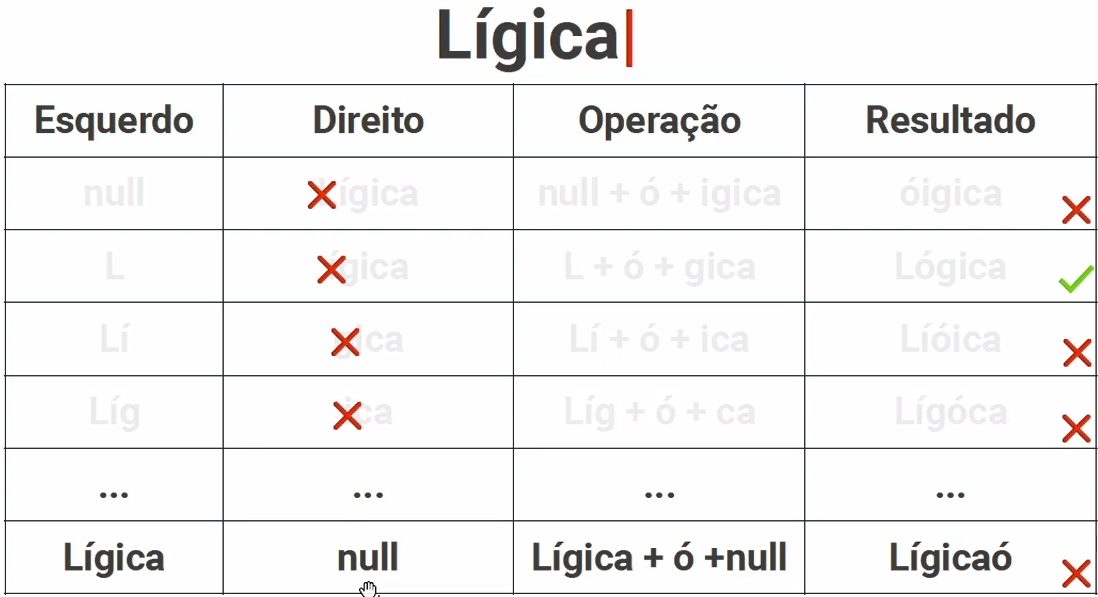

Troca quando é digitado 1 letra errada.

In [101]:
#MESCLANDO TODOS OS CODIGOS

def insere_letras(fatias):    
    novas_palavras = []
    letras = 'abcdefghijklmnopqrstuvwxyzàáâãèéêìíîòóôõùúûç'
    for E, D in fatias:
        for letra in letras:
            novas_palavras.append(E + letra + D)
    return novas_palavras

def deletando_caracteres(fatias):    
    novas_palavras = []
    for E, D in fatias:
        novas_palavras.append(E + D[1:])
    return novas_palavras

def troca_letra(fatias):    
    novas_palavras = [] #onde será armazenada as palavras gerada
    letras = 'abcdefghijklmnopqrstuvwxyzàáâãèéêìíîòóôõùúûç' #as letras que podem ser digitadas erradas
    #para verificar cada letra acima e incluir no meio do fatiamento
    for E, D in fatias: #Interaçao sobre o lado esquerdo e direito das fatias
        for letra in letras: #percorre as letras do alfabeto
            novas_palavras.append(E + letra + D[1:]) #operaçao adicionando na variavel novas palavras
    return novas_palavras   

def gerador_palavras(palavra): #funçao 
    fatias = [] #o lado direito e o lado esquerdo da imagem acima
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i], palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    palavras_geradas += deletando_caracteres(fatias)
    palavras_geradas += troca_letra(fatias)
    return palavras_geradas

palavra_exemplo = 'ligica'
palavras_geradas = gerador_palavras(palavra_exemplo)
palavras_geradas

['aligica',
 'bligica',
 'cligica',
 'dligica',
 'eligica',
 'fligica',
 'gligica',
 'hligica',
 'iligica',
 'jligica',
 'kligica',
 'lligica',
 'mligica',
 'nligica',
 'oligica',
 'pligica',
 'qligica',
 'rligica',
 'sligica',
 'tligica',
 'uligica',
 'vligica',
 'wligica',
 'xligica',
 'yligica',
 'zligica',
 'àligica',
 'áligica',
 'âligica',
 'ãligica',
 'èligica',
 'éligica',
 'êligica',
 'ìligica',
 'íligica',
 'îligica',
 'òligica',
 'óligica',
 'ôligica',
 'õligica',
 'ùligica',
 'úligica',
 'ûligica',
 'çligica',
 'laigica',
 'lbigica',
 'lcigica',
 'ldigica',
 'leigica',
 'lfigica',
 'lgigica',
 'lhigica',
 'liigica',
 'ljigica',
 'lkigica',
 'lligica',
 'lmigica',
 'lnigica',
 'loigica',
 'lpigica',
 'lqigica',
 'lrigica',
 'lsigica',
 'ltigica',
 'luigica',
 'lvigica',
 'lwigica',
 'lxigica',
 'lyigica',
 'lzigica',
 'làigica',
 'láigica',
 'lâigica',
 'lãigica',
 'lèigica',
 'léigica',
 'lêigica',
 'lìigica',
 'líigica',
 'lîigica',
 'lòigica',
 'lóigica',
 'lôigica',
 'lõ

##### Invertendo letras

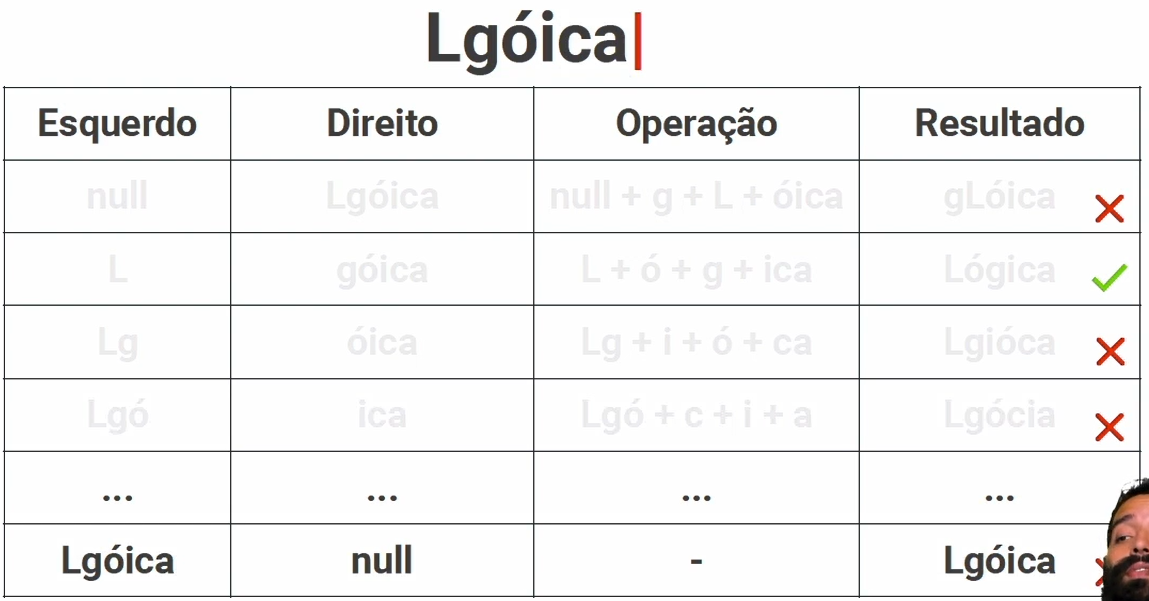

logica para troca de letras

In [102]:
def insere_letras(fatias):    
    novas_palavras = []
    letras = 'abcdefghijklmnopqrstuvwxyzàáâãèéêìíîòóôõùúûç'
    for E, D in fatias:
        for letra in letras:
            novas_palavras.append(E + letra + D)
    return novas_palavras

def deletando_caracteres(fatias):    
    novas_palavras = []
    for E, D in fatias:
        novas_palavras.append(E + D[1:])
    return novas_palavras

def troca_letra(fatias):    
    novas_palavras = [] #onde será armazenada as palavras gerada
    letras = 'abcdefghijklmnopqrstuvwxyzàáâãèéêìíîòóôõùúûç' #as letras que podem ser digitadas erradas
    #para verificar cada letra acima e incluir no meio do fatiamento
    for E, D in fatias: #Interaçao sobre o lado esquerdo e direito das fatias
        for letra in letras: #percorre as letras do alfabeto
            novas_palavras.append(E + letra + D[1:]) #operaçao adicionando na variavel novas palavras
    return novas_palavras   

def inverte_letra(fatias):    
    novas_palavras = []
    for E, D in fatias:
        if len(D) > 1:
            novas_palavras.append(E + D[1]+D[0]+D[2:])
    return novas_palavras

def gerador_palavras(palavra): #funçao 
    fatias = [] #o lado direito e o lado esquerdo da imagem acima
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i], palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    palavras_geradas += deletando_caracteres(fatias)
    palavras_geradas += troca_letra(fatias)
    palavras_geradas += inverte_letra(fatias)
    return palavras_geradas

palavra_exemplo = 'logiac'
palavras_geradas = gerador_palavras(palavra_exemplo)
palavras_geradas

['alogiac',
 'blogiac',
 'clogiac',
 'dlogiac',
 'elogiac',
 'flogiac',
 'glogiac',
 'hlogiac',
 'ilogiac',
 'jlogiac',
 'klogiac',
 'llogiac',
 'mlogiac',
 'nlogiac',
 'ologiac',
 'plogiac',
 'qlogiac',
 'rlogiac',
 'slogiac',
 'tlogiac',
 'ulogiac',
 'vlogiac',
 'wlogiac',
 'xlogiac',
 'ylogiac',
 'zlogiac',
 'àlogiac',
 'álogiac',
 'âlogiac',
 'ãlogiac',
 'èlogiac',
 'élogiac',
 'êlogiac',
 'ìlogiac',
 'ílogiac',
 'îlogiac',
 'òlogiac',
 'ólogiac',
 'ôlogiac',
 'õlogiac',
 'ùlogiac',
 'úlogiac',
 'ûlogiac',
 'çlogiac',
 'laogiac',
 'lbogiac',
 'lcogiac',
 'ldogiac',
 'leogiac',
 'lfogiac',
 'lgogiac',
 'lhogiac',
 'liogiac',
 'ljogiac',
 'lkogiac',
 'llogiac',
 'lmogiac',
 'lnogiac',
 'loogiac',
 'lpogiac',
 'lqogiac',
 'lrogiac',
 'lsogiac',
 'ltogiac',
 'luogiac',
 'lvogiac',
 'lwogiac',
 'lxogiac',
 'lyogiac',
 'lzogiac',
 'làogiac',
 'láogiac',
 'lâogiac',
 'lãogiac',
 'lèogiac',
 'léogiac',
 'lêogiac',
 'lìogiac',
 'líogiac',
 'lîogiac',
 'lòogiac',
 'lóogiac',
 'lôogiac',
 'lõ

In [103]:
avaliador(lista_teste)

Taxa de acerto do corretor - 62.9% / De um total de 186 palavras


##### Calcular quantas palavras são desconhecidas

In [104]:
# modificando a funçao AVALIADOR
def avaliador(testes, vocabulario):
    numero_palavras = len(testes)
    acertou = 0
    desconhecida = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        if palavra_corrigida == correta:
            acertou += 1
        else:
            desconhecida += (correta not in vocabulario)
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    taxa_desconhecida = round(desconhecida*100/numero_palavras, 2) #nova variavel
    print(f"Taxa de acerto do corretor - {taxa_acerto}% / De um total de {numero_palavras} palavras / Com uma taxa de {taxa_desconhecida}% de palavras desconhecidas")

vocabulario = set(lista_normalizada)
    
avaliador(lista_teste, vocabulario)

Taxa de acerto do corretor - 62.9% / De um total de 186 palavras / Com uma taxa de 7.53% de palavras desconhecidas


##### Criando um exemplo para corrigir a duas distancias

In [105]:
palavra = 'lóiigica'

def gerador_turbinado(palavras_geradas):
    novas_palavras = []
    for palavra in palavras_geradas:
        novas_palavras += gerador_palavras(palavra)
    return novas_palavras

palavras_g = gerador_turbinado(gerador_palavras(palavra))
'lógica' in palavras_g

True

In [106]:
len(palavras_g) #a palavra LOIIGICA gerou 691 mil variações entre a palavra correta
#porem fica inviavel dessa maneira, pois contem muitas opções para apenas 1 palavra

691744

In [107]:
#codigo base da DEF CORRETOR
def novo_corretor(palavra):
    palavras_geradas = gerador_palavras(palavra)
    palavras_turbinado = gerador_turbinado(palavras_geradas)
    todas_palavras = set(palavras_geradas + palavras_turbinado)
    candidatos = [palavra]
    for palavra in todas_palavras:
        if palavra in vocabulario:
            candidatos.append(palavra)
    palavra_correta = max(candidatos, key=probabilidade)
    return palavra_correta

novo_corretor(palavra) #palavra foi definida lá em cima como loiigica
#antes tinha 700 mil palavras, mas agora o que não foi validade foi descartado, sobrando 2 palavras
#agora é só aplicar ao codigo do corretor

'lógica'

In [108]:
def avaliador(testes, vocabulario):
    numero_palavras = len(testes)
    acertou = 0
    desconhecida = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        desconhecida += (correta not in vocabulario)
        if palavra_corrigida == correta:
            acertou += 1
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    taxa_desconhecida = round(desconhecida*100/numero_palavras, 2) #nova variavel
    print(f"Taxa de acerto do corretor - {taxa_acerto}% / De um total de {numero_palavras} palavras / Com uma taxa de {taxa_desconhecida}% de palavras desconhecidas")

vocabulario = set(lista_normalizada)
    
avaliador(lista_teste, vocabulario)

Taxa de acerto do corretor - 62.9% / De um total de 186 palavras / Com uma taxa de 7.53% de palavras desconhecidas


In [120]:
palavra = 'alavra'
print(f'novo corretor - {novo_corretor(palavra)}')
print(f'antigo corretor - {corretor(palavra)}')

novo corretor - alvura
antigo corretor - palavra
